### Main Data Prep

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1046]:
apt_df = pd.read_csv("C:/Users/zhaoy/Downloads/apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252', dtype={15: str})


In [1048]:
pd.reset_option('all')
pd.set_option('display.max_columns', None)
apt_df

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\_config\config.py:630: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\_config\config.py:630: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,None,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,780.0,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",813.0,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",1325.0,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",931.0,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [1202]:
apt_df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

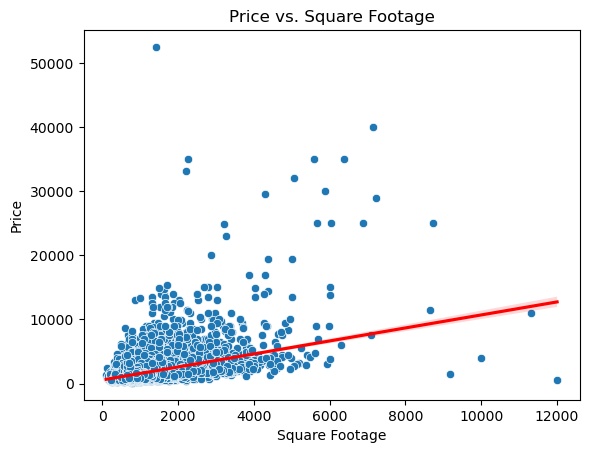

In [1206]:
sns.scatterplot(data=cleaned_apt_df, x='square_feet', y='price')
sns.regplot(data=cleaned_apt_df, x='square_feet', y='price', scatter=False, color='red')

plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


In [1049]:
# Count the number of observations for each unique value in the 'cityname' column
city_counts = apt_df['cityname'].value_counts()
city_counts

Dallas          2858
Denver          2755
Los Angeles     2433
Las Vegas       1848
Arlington       1577
                ... 
Flomaton           1
Murphysboro        1
Highwood           1
Del Mar            1
Willow Grove       1
Name: cityname, Length: 2979, dtype: int64

In [1050]:
# Describing the dataset
apt_df_description = apt_df.describe(include='all')
apt_df_description

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
count,9.949200e+04,99492,99492,99492,83448,99429.000000,99368.000000,99492,99492,99492,44138,99491.000000,99491,99492,99492.000000,7943,99190,99190,99467.000000,99467.000000,99492,9.949200e+04
unique,NaN,7,58503,94503,9827,NaN,NaN,1,2,3,5,NaN,3718,3,NaN,7771,2979,51,NaN,NaN,25,NaN
top,NaN,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,NaN,NaN,USD,No,Yes,"Cats,Dogs",NaN,"$1,350",Monthly,NaN,8215 S.W 72nd Avenue,Dallas,TX,NaN,NaN,RentDigs.com,NaN
freq,NaN,99431,1064,43,6188,NaN,NaN,99492,99291,55974,37097,NaN,574,99488,NaN,19,2858,11257,NaN,NaN,90912,NaN
mean,5.358321e+09,NaN,NaN,NaN,NaN,1.445323,1.728212,NaN,NaN,NaN,NaN,1527.057281,NaN,NaN,956.430688,NaN,NaN,NaN,36.947988,-91.568656,NaN,1.559665e+09
std,1.847404e+08,NaN,NaN,NaN,NaN,0.547021,0.749200,NaN,NaN,NaN,NaN,904.245882,NaN,NaN,417.571522,NaN,NaN,NaN,4.599461,15.817168,NaN,1.105077e+07
min,5.121046e+09,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,101.000000,NaN,NaN,NaN,19.573800,-159.369800,NaN,1.544174e+09
25%,5.197950e+09,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1013.000000,NaN,NaN,729.000000,NaN,NaN,NaN,33.746500,-104.791900,NaN,1.550832e+09
50%,5.508673e+09,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,1350.000000,NaN,NaN,900.000000,NaN,NaN,NaN,37.228200,-84.562300,NaN,1.568745e+09
75%,5.509007e+09,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1795.000000,NaN,NaN,1115.000000,NaN,NaN,NaN,39.953000,-77.608200,NaN,1.568767e+09


In [1051]:
apt_df.category.value_counts()

housing/rent/apartment            99431
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: category, dtype: int64

In [1052]:
# Making a copy of the dataframe for analysis
apt_copy = apt_df.copy()

# Keeping observations that are apratment renting only
apt_copy= apt_copy[apt_copy['category'] == 'housing/rent/apartment']

In [1053]:
apt_copy.price_type.value_counts()

Monthly           99427
Weekly                3
Monthly|Weekly        1
Name: price_type, dtype: int64

In [1054]:
# Keep only observations with monthly renting
apt_copy = apt_copy[apt_copy['price_type'] == 'Monthly']
apt_copy.price_type.value_counts()

Monthly    99427
Name: price_type, dtype: int64

In [892]:
# Keep observations in the mainland US only
#apt_copy = apt_copy[~apt_copy['state'].isin(['AK', 'HI'])]

In [1055]:
apt_copy.state.unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', nan, 'ME'], dtype=object)

In [1056]:
apt_copy.pets_allowed.value_counts() # Too many missing values, will drop the column later

Cats,Dogs         37089
None               5066
Cats               1843
Dogs                127
Cats,Dogs,None        1
Name: pets_allowed, dtype: int64

In [1057]:
apt_copy.amenities.isnull().sum()

16042

In [734]:
# Handling amenities column
value_counts = apt_copy.amenities.value_counts()
for i in range(0, len(value_counts), 5): 
    print(value_counts[i:i+5])
    input("Press Enter to continue...")  # Since I'm only interested in features mentioned the most, I will interrupt the kernel at some point

Parking             6185
Parking,Storage     2116
Gym,Pool            1871
Pool                1485
Gym,Parking,Pool    1187
Name: amenities, dtype: int64


Press Enter to continue... 


Parking,Pool          885
Washer Dryer          839
Patio/Deck            771
Clubhouse,Gym,Pool    760
Gym                   735
Name: amenities, dtype: int64


Press Enter to continue... 


Parking,Patio/Deck,Storage    664
Wood Floors                   626
Parking,Washer Dryer          520
Gym,Patio/Deck,Pool           518
Gym,Parking,Pool,Storage      477
Name: amenities, dtype: int64


Press Enter to continue... 


Clubhouse,Gym,Parking,Pool    430
Parking,Patio/Deck            427
Parking,Wood Floors           422
Cable or Satellite,TV         407
Refrigerator                  398
Name: amenities, dtype: int64


Press Enter to continue... 


Storage                  398
Patio/Deck,Pool          375
Clubhouse,Pool           374
Gym,Parking              338
Gym,Pool,Washer Dryer    315
Name: amenities, dtype: int64


Press Enter to continue... 


Parking,Patio/Deck,Pool          310
Dishwasher,Refrigerator          302
Gym,Parking,Pool,Washer Dryer    299
Gym,Parking,Storage              297
Gym,Pool,Storage                 297
Name: amenities, dtype: int64


KeyboardInterrupt: Interrupted by user

In [1058]:
# Keywords from amenities
keywords = ['Parking', 'Storage', 'Gym', 'Pool', 'Washer', 'Dryer', 'Patio', 'Cable', 'Wood Floors', 'Dishwasher', 'Clubhouse']

# Create a dummy variable for each
for keyword in keywords:
    apt_copy["Has_" + keyword] = apt_copy['amenities'].str.contains(keyword, case=False, na=False).astype(int)

apt_copy.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,Has_Parking,Has_Storage,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable,Has_Wood Floors,Has_Dishwasher,Has_Clubhouse
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,0,0,0,0,0,0,0,0,0,0,0
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,0,0,0,0,0,0,0,0,0,0,0
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,None,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,0,0,0,0,0,0,0,0,0,0,0
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,0,0,0,0,0,0,0,0,0,0,0
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,0,0,0,0,0,0,0,0,0,0,0


In [1059]:
# Replace spaces with underscores in column names
apt_copy.columns = apt_copy.columns.str.replace(' ', '_')

In [1060]:
apt_copy.Has_Wood_Floors.value_counts()

0    90593
1     8834
Name: Has_Wood_Floors, dtype: int64

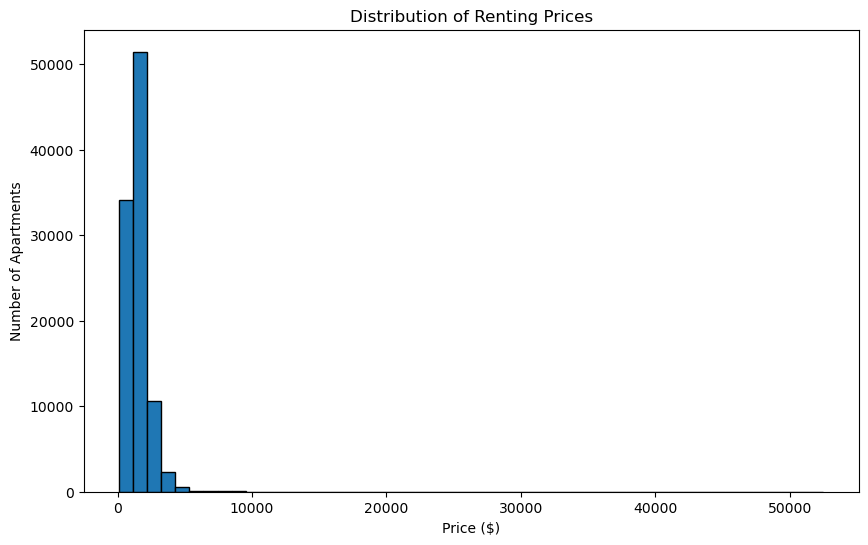

In [1061]:
plt.figure(figsize=(10, 6))
plt.hist(apt_copy['price'], bins=50, edgecolor='black')
plt.title('Distribution of Renting Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apartments')
plt.show()

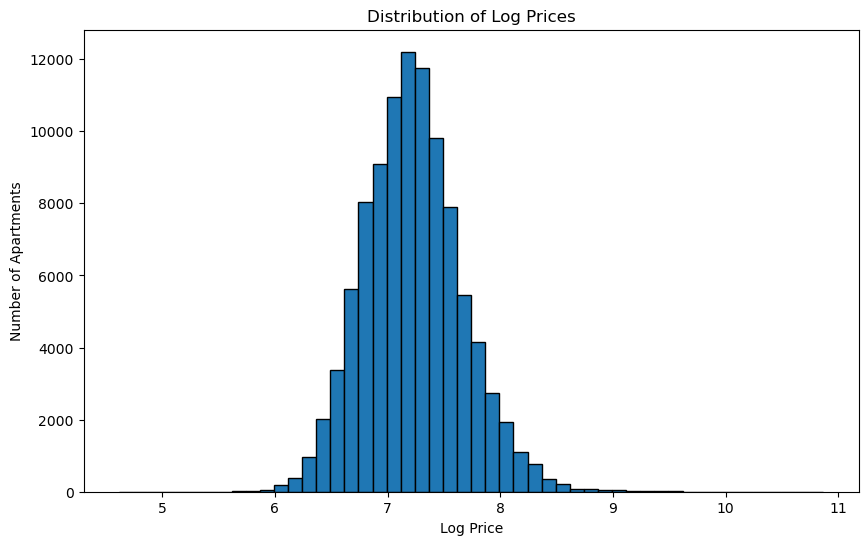

In [1063]:
# Taking the logarithm of the price to reduce skewness
apt_copy['log_price'] = np.log(apt_copy['price'] + 1)

plt.figure(figsize=(10, 6))
plt.hist(apt_copy['log_price'], bins=50, edgecolor='black')
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Number of Apartments')
plt.show()

In [837]:
apt_copy.body.unique()

array(['This unit is located at 507 & 509 Esplanade, Redondo Beach, 90277, CAMonthly rental rates range from $2195We have 1 beds units available for rent',
       'This unit is located at 146 Lochview Drive, Newport News, 23602, VAMonthly rental rates range from $1250We have 3 beds units available for rent',
       'This unit is located at 3101 Morningside Drive, Raleigh, 27607, NCMonthly rental rates range from $1395We have 3 beds units available for rent',
       ...,
       'Fully remodeled, new floor, kitchen cabinet, stove, refrigerator, bathroom, paint. Ok for pets. 619 fully remodeled, new floor, kitchen cabinet, stove, refrigerator, bathroom, paint. Pets allowed. Maria. Pets Allowed, Overhead fans, Stove, Garbage Disposal, Refrigerator, Trash Included.',
       'Amenities include a fitness facilities, swimming pool, gaming lawn and indoor golf simulator and putting green. Apartments have built in wine racks, stainless appliances, quartz counters and so much more. Washers and dr

In [839]:
# Handling body column
value_counts2 = apt_copy.body.value_counts()
for i in range(0, len(value_counts2), 5): 
    print(value_counts2[i:i+5])
    input("Press Enter to continue...")

When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provides you with immediate access to shopping, entertainment, transportation and is directly across from Northwest Hospital. Commuters enjoy easy access to Baltimore's Inner, Baltimore Washington International Airport BWI, Owings Mills, Pikesville, and Catonsville. The Crossing enjoy the comforts of an apartment they are truly proud to with wall-to-wall carpeting, fully-equipped kitchens with dishwashers, over-sized closets and expansive balconies. Outside your home, Northwest Crossing boasts a fitness facilities, basketball and professionally landscaped grounds with picnic areas. Take pleasure in knowing that our professional management team is here to assist you with any need great or small. We are excited to meet you and welcome you home!                                                                

Press Enter to continue... 


The Olive Tree represents the best in luxurious apartments in. State of the art style infuses every apartment home, the property and our community features. Our apartments offer an array of signature interior features, as well as many ways to relax and enjoy our community amenities. A stroll around our property will give you so many ideas for how you can relax and enjoy life here. We invite you to tour our apartment community. Our attentive and friendly staff is here to show you all of the ways that Olive Tree is your ideal apartment home. Get in touch with us today, and well show you why we think our apartments for rent in are the best in town. Income Requirement: Must have 3. 0x the rent in total household income before taxes, include income from all adults. Utilities: Renter responsible for all utilities. Pet restrictions: Breed restrictions apply. Parking Info: Open lot: included in lease.                                                                                              

KeyboardInterrupt: Interrupted by user

In [1064]:
# Extract some keywords from apartment description
keywords_2 = ['Fully remodeled', 'brand new', 'close to public transportation', 'luxurious', 'downtown']

# Create a dummy variable for each
for keyword in keywords_2:
    apt_copy["is_" + keyword] = apt_copy['body'].str.contains(keyword, case=False, na=False).astype(int)

apt_copy.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,Has_Parking,Has_Storage,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable,Has_Wood_Floors,Has_Dishwasher,Has_Clubhouse,log_price,is_Fully remodeled,is_brand new,is_close to public transportation,is_luxurious,is_downtown
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,0,0,0,0,0,0,0,0,0,0,0,7.694393,0,0,0,0,0
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,0,0,0,0,0,0,0,0,0,0,0,7.131699,0,0,0,0,0
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,None,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,0,0,0,0,0,0,0,0,0,0,0,7.241366,0,0,0,0,0
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,0,0,0,0,0,0,0,0,0,0,0,7.378384,0,0,0,0,0
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,0,0,0,0,0,0,0,0,0,0,0,6.883463,0,0,0,0,0


In [1065]:
# Replace spaces with underscores in column names
apt_copy.columns = apt_copy.columns.str.replace(' ', '_')

In [1066]:
apt_copy.is_downtown.value_counts()

0    84167
1    15260
Name: is_downtown, dtype: int64

In [1067]:
apt_copy.currency.unique()

array(['USD'], dtype=object)

In [1068]:
apt_copy.price_display

0        $2,195
1        $1,250
2        $1,395
3        $1,600
4          $975
          ...  
99487      $780
99488      $813
99489    $1,325
99490      $931
99491    $1,595
Name: price_display, Length: 99427, dtype: object

In [1069]:
apt_copy.source.value_counts()

RentDigs.com         90863
RentLingo             6924
ListedBuy              558
GoSection8             437
RealRentals            268
tenantcloud            124
BostonApartments        94
RENTCafé                41
Listanza                29
SpreadMyAd              21
RENTOCULAR              18
RentFeeder              12
Home Rentals             8
Claz                     7
vFlyer                   5
rentbits                 5
Nest Seekers             4
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: source, dtype: int64

In [1070]:
apt_copy.has_photo.value_counts()

Yes          55949
Thumbnail    34264
No            9214
Name: has_photo, dtype: int64

In [1109]:
# Creating dummy variables for different states and listing sources, and whether the listing has photo or not or thunbnail
apt_copy_new = pd.get_dummies(apt_copy, columns=['state','has_photo', 'source'], drop_first=True)
apt_copy_new.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,pets_allowed,price,price_display,price_type,square_feet,address,cityname,latitude,longitude,time,Has_Parking,Has_Storage,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable,Has_Wood_Floors,Has_Dishwasher,Has_Clubhouse,log_price,is_Fully_remodeled,is_brand_new,is_close_to_public_transportation,is_luxurious,is_downtown,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,has_photo_Thumbnail,has_photo_Yes,source_Apartable,source_BostonApartments,source_Claz,source_FreeAdsTime,source_GoSection8,source_Home Rentals,source_HousesForRent,source_Listanza,source_ListedBuy,source_Nest Seekers,source_RENTCafé,source_RENTOCULAR,source_Real Estate Agent,source_Real Estate Shows,source_RealRentals,source_RentDigs.com,source_RentFeeder,source_RentLingo,source_Seattle Rentals,source_SpreadMyAd,source_Z57,source_rentbits,source_tenantcloud,source_vFlyer
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,33.8520,-118.3759,1577360355,0,0,0,0,0,0,0,0,0,0,0,7.694393,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,37.0867,-76.4941,1577360340,0,0,0,0,0,0,0,0,0,0,0,7.131699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,None,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,35.8230,-78.6438,1577360332,0,0,0,0,0,0,0,0,0,0,0,7.241366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,38.3622,-121.9712,1577360330,0,0,0,0,0,0,0,0,0,0,0,7.378384,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,35.1038,-106.6110,1577360308,0,0,0,0,0,0,0,0,0,0,0,6.883463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Data Prep for Prediction Models

In [1091]:
apt_copy_new.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'pets_allowed',
       ...
       'source_RealRentals', 'source_RentDigs.com', 'source_RentFeeder',
       'source_RentLingo', 'source_Seattle Rentals', 'source_SpreadMyAd',
       'source_Z57', 'source_rentbits', 'source_tenantcloud', 'source_vFlyer'],
      dtype='object', length=112)

In [1138]:
# Dropping irrelevant columns
columns_to_drop = ['id', 'category', 'title', 'body', 'currency', 'fee', 'address',
                   'price_display', 'price_type', 'time', 'pets_allowed', 'amenities','cityname']

new_apt_df = apt_copy_new.drop(columns=columns_to_drop)

new_apt_df.columns

Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'Has_Parking', 'Has_Storage', 'Has_Gym', 'Has_Pool',
       'Has_Washer', 'Has_Dryer', 'Has_Patio', 'Has_Cable', 'Has_Wood_Floors',
       'Has_Dishwasher', 'Has_Clubhouse', 'log_price', 'is_Fully_remodeled',
       'is_brand_new', 'is_close_to_public_transportation', 'is_luxurious',
       'is_downtown', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
    

In [1075]:
# Checking for missing value percentage
missing_values = new_apt_df.isnull().sum()
missing_values_percentage = (missing_values / new_apt_df.shape[0]) * 100

missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
pd.set_option('display.max_rows', None)
missing_values_summary

,Missing Values,Percentage
bathrooms,61,0.061352
bedrooms,123,0.123709
price,1,0.001006
square_feet,0,0.000000
latitude,25,0.025144
longitude,25,0.025144
Has_Parking,0,0.000000
Has_Storage,0,0.000000
Has_Gym,0,0.000000
Has_Pool,0,0.000000


In [1139]:
# Since there aren't a large number of missing values, we can now drop the missing values
cleaned_apt_df = new_apt_df.dropna(subset=['bathrooms', 'bedrooms', 'price', 'log_price', 'latitude', 'longitude'])
cleaned_apt_df.isnull().sum()

bathrooms             0
bedrooms              0
price                 0
square_feet           0
latitude              0
                     ..
source_SpreadMyAd     0
source_Z57            0
source_rentbits       0
source_tenantcloud    0
source_vFlyer         0
Length: 99, dtype: int64

In [1094]:
# Convert the DataFrame columns to a list and print
column_list = cleaned_apt_df.columns.tolist()
print(column_list)

['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'Has_Parking', 'Has_Storage', 'Has_Gym', 'Has_Pool', 'Has_Washer', 'Has_Dryer', 'Has_Patio', 'Has_Cable', 'Has_Wood_Floors', 'Has_Dishwasher', 'Has_Clubhouse', 'log_price', 'is_Fully_remodeled', 'is_brand_new', 'is_close_to_public_transportation', 'is_luxurious', 'is_downtown', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'has_photo_Thumbnail', 'has_photo_Yes', 'sourc

In [1114]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\_config\config.py:630: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\_config\config.py:630: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




### Predicting Prices

In [1171]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [1203]:
cleaned_apt_df

,bathrooms,bedrooms,price,square_feet,latitude,longitude,Has_Parking,Has_Storage,Has_Gym,Has_Pool,...,source_RealRentals,source_RentDigs.com,source_RentFeeder,source_RentLingo,source_Seattle Rentals,source_SpreadMyAd,source_Z57,source_rentbits,source_tenantcloud,source_vFlyer
0,1.0,1.0,2195.0,542,33.8520,-118.3759,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500,37.0867,-76.4941,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650,35.8230,-78.6438,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,2.0,1600.0,820,38.3622,-121.9712,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.0,975.0,624,35.1038,-106.6110,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,1.0,780.0,605,29.6151,-95.1998,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
99488,2.0,2.0,813.0,921,30.2254,-81.7579,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
99489,1.0,1.0,1325.0,650,32.7379,-117.0914,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99490,1.0,1.0,931.0,701,35.4158,-80.8451,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


#### Linear Regression

In [1229]:
# Preparing the features (X) and target (y)
X = cleaned_apt_df.drop(columns=['price', 'log_price'])
y = cleaned_apt_df['log_price']

# Prepare a pipeline for cross validation
linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Linear regression cross-validation
linear_cv_scores = cross_val_score(linear_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_r2 = cross_val_score(linear_pipeline, X, y, cv=5, scoring='r2')

# Evaluation
linear_cv_r2_mean = lin_cv_r2.mean()
linear_cv_scores_mean = -lin_cv_scores.mean()
linear_cv_scores_std = lin_cv_scores.std()

lin_cv_scores_mean,linear_cv_scores_std, linear_cv_r2_mean


(0.08416335914957848, 0.007607165263025043, 0.5567748891063913)

In [1223]:
linear_cv_scores

array([-0.07953138, -0.07115684, -0.08662821, -0.08708424, -0.09315051])

In [1220]:
# Final evaluation by splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


lin_pipeline = make_pipeline(StandardScaler(), LinearRegression())
lin_pipeline.fit(X_train, y_train)
y_pred = lin_pipeline.predict(X_test)

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred)

mse_lin, rmse_lin, r2_lin


(0.08046345901677285, 0.283660816851346, 0.5835425794899018)

In [1166]:
linear_model = lin_pipeline.named_steps['linearregression']

# Extracting coefficients
linear_coefficients = linear_model.coef_

# Mapping coefficients to feature names
feature_names = X.columns
coefficients_dict = dict(zip(feature_names, linear_coefficients))

coefficients_dict


{'bathrooms': 0.07547059870372051,
 'bedrooms': -0.029139844910432963,
 'square_feet': 0.14528714181330898,
 'latitude': 0.09154966045596716,
 'longitude': 0.19109093164592034,
 'Has_Parking': 0.019851097005851515,
 'Has_Storage': 0.005928715906874327,
 'Has_Gym': 0.028720490765550298,
 'Has_Pool': -0.002259131019479492,
 'Has_Washer': -0.021380281921967823,
 'Has_Dryer': 0.007190835607792753,
 'Has_Patio': 0.00033677666409770435,
 'Has_Cable': -0.009727426260701673,
 'Has_Wood_Floors': 0.012262031426569078,
 'Has_Dishwasher': -0.009483872993698475,
 'Has_Clubhouse': -0.01570468257449706,
 'is_Fully_remodeled': -0.0026225596942834398,
 'is_brand_new': 0.01784594476504188,
 'is_close_to_public_transportation': -0.0016836402443419739,
 'is_luxurious': 0.04080489358747562,
 'is_downtown': 0.017079066001439623,
 'state_AL': -0.03698909996645309,
 'state_AR': -0.050224325994520196,
 'state_AZ': -0.02044670181332913,
 'state_CA': 0.19845008887209634,
 'state_CO': -0.0023288461503632243,
 'st

In [1167]:
price_range = cleaned_apt_df.log_price.max() - cleaned_apt_df.log_price.min()
price_range

6.253466979176099

#### Ridge

In [1172]:
# Finding the optimal lambda
X = cleaned_apt_df.drop(columns=['price', 'log_price'])
y = cleaned_apt_df['log_price']

n_lambdas = 600
lambdas = np.linspace(0, 1000, n_lambdas)
mses = []
coefs = []

for alpha in lambdas:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha, fit_intercept=True))
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    
    scores = -scores
    mses.append(scores.mean())
    
    pipeline.fit(X, y)
    coefs.append(pipeline.named_steps['ridge'].coef_)

optimal_lambda = lambdas[np.argmin(mses)]

print(f"Optimal Lambda: {optimal_lambda}")


Optimal Lambda: 40.066777963272116


In [1173]:
# Ridge regression using optimal lambda value

ridge_model_optimal_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=optimal_lambda))

# Cross-validation
ridge_cv_scores = cross_val_score(ridge_model_optimal_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_r2 = cross_val_score(ridge_model_optimal_pipeline, X, y, cv=5, scoring='r2')

# Evaluation
ridge_cv_r2_mean = ridge_cv_r2.mean()
ridge_cv_scores_mean = -ridge_cv_scores.mean()
ridge_cv_scores_std = ridge_cv_scores.std()

ridge_cv_scores_mean,ridge_cv_scores_std, ridge_cv_r2_mean


(0.08348636507804423, 0.007497693268265019, 0.5601029359727594)

In [1178]:
# Final evaluation by splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=optimal_lambda))
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge, rmse_ridge, r2_ridge

(0.07969906861030847, 0.282310234689266, 0.5832756091527969)

In [1179]:
ridge_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=40.066777963272116))])

In [1180]:
ridge_model = ridge_pipeline.named_steps['ridge']

# Extracting coefficients
ridge_coefficients = ridge_model.coef_

# Mapping coefficients to feature names
feature_names = X.columns
ridge_coefficients_dict = dict(zip(feature_names, ridge_coefficients))

ridge_coefficients_dict


{'bathrooms': 0.07577899629784611,
 'bedrooms': -0.02746836662523106,
 'square_feet': 0.14387605483031413,
 'latitude': 0.08081224785232875,
 'longitude': 0.16936961695558556,
 'Has_Parking': 0.020986331140674358,
 'Has_Storage': 0.005840121131521146,
 'Has_Gym': 0.027709055630044294,
 'Has_Pool': -0.0006735015568562419,
 'Has_Washer': -0.024020551128042727,
 'Has_Dryer': 0.009072281802417148,
 'Has_Patio': -0.0002606761833837536,
 'Has_Cable': -0.010863196903888657,
 'Has_Wood_Floors': 0.012594785520714871,
 'Has_Dishwasher': -0.007972268106213272,
 'Has_Clubhouse': -0.014692093698240772,
 'is_Fully_remodeled': -0.0021225879369281197,
 'is_brand_new': 0.01711186721639448,
 'is_close_to_public_transportation': -0.0017859137046606888,
 'is_luxurious': 0.04074469229387034,
 'is_downtown': 0.01644750938616164,
 'state_AL': -0.03634314734890365,
 'state_AR': -0.05129542324323758,
 'state_AZ': -0.02439214015490052,
 'state_CA': 0.18712133149143537,
 'state_CO': -0.0025199127199023973,
 'sta

In [1181]:
sum_sq_linear = np.sum(np.square(linear_coefficients))
sum_sq_ridge = np.sum(np.square(ridge_coefficients))
print(f"Sum squared error of Linear: {sum_sq_linear:.8f}")
print(f"Sum squared error of Ridge: {sum_sq_ridge:.8f}")

Sum squared error of Linear: 0.25227165
Sum squared error of Ridge: 0.22196241


In [1182]:
# Comparing coefficients
differences = ridge_coefficients - linear_coefficients
differences

array([ 3.08397594e-04,  1.67147829e-03, -1.41108698e-03, -1.07374126e-02,
       -2.17213147e-02,  1.13523413e-03, -8.85947754e-05, -1.01143514e-03,
        1.58562946e-03, -2.64026921e-03,  1.88144619e-03, -5.97452847e-04,
       -1.13577064e-03,  3.32754094e-04,  1.51160489e-03,  1.01258888e-03,
        4.99971757e-04, -7.34077549e-04, -1.02273460e-04, -6.02012936e-05,
       -6.31556615e-04,  6.45952618e-04, -1.07109725e-03, -3.94543834e-03,
       -1.13287574e-02, -1.91066570e-04,  2.88978810e-03,  1.18660162e-03,
       -5.66733521e-04, -1.96376463e-04,  2.12169399e-03, -5.01103351e-03,
        9.61971610e-04, -2.18188991e-04,  2.55656630e-03,  1.04961657e-03,
       -6.37113216e-05,  1.79303864e-03, -1.36501265e-03,  1.11756172e-02,
        8.20931012e-03,  2.10557675e-03,  3.23260818e-03,  2.08040761e-03,
        8.52670562e-04,  1.73661111e-03,  4.99142340e-05,  5.71185863e-03,
        2.65409123e-03,  8.75114382e-04,  4.28323719e-03,  7.46592503e-03,
       -7.42585512e-04, -

In [1187]:
# Direct comparison of differences
coefficients_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_coefficients,
    'Ridge': ridge_coefficients,
    'Difference': differences
})
print(coefficients_comparison.sort_values(by='Difference', key=abs, ascending=False))

                              Feature    Linear     Ridge  Difference
88                source_RentDigs.com  0.044247 -0.004179   -0.048427
90                   source_RentLingo  0.066800  0.024366   -0.042434
4                           longitude  0.191091  0.169370   -0.021721
81                   source_ListedBuy  0.004554 -0.008810   -0.013363
77                  source_GoSection8  0.001066 -0.011492   -0.012558
..                                ...       ...       ...         ...
18  is_close_to_public_transportation -0.001684 -0.001786   -0.000102
6                         Has_Storage  0.005929  0.005840   -0.000089
36                           state_KS -0.063004 -0.063067   -0.000064
19                       is_luxurious  0.040805  0.040745   -0.000060
46                           state_MT -0.011193 -0.011143    0.000050

[97 rows x 4 columns]


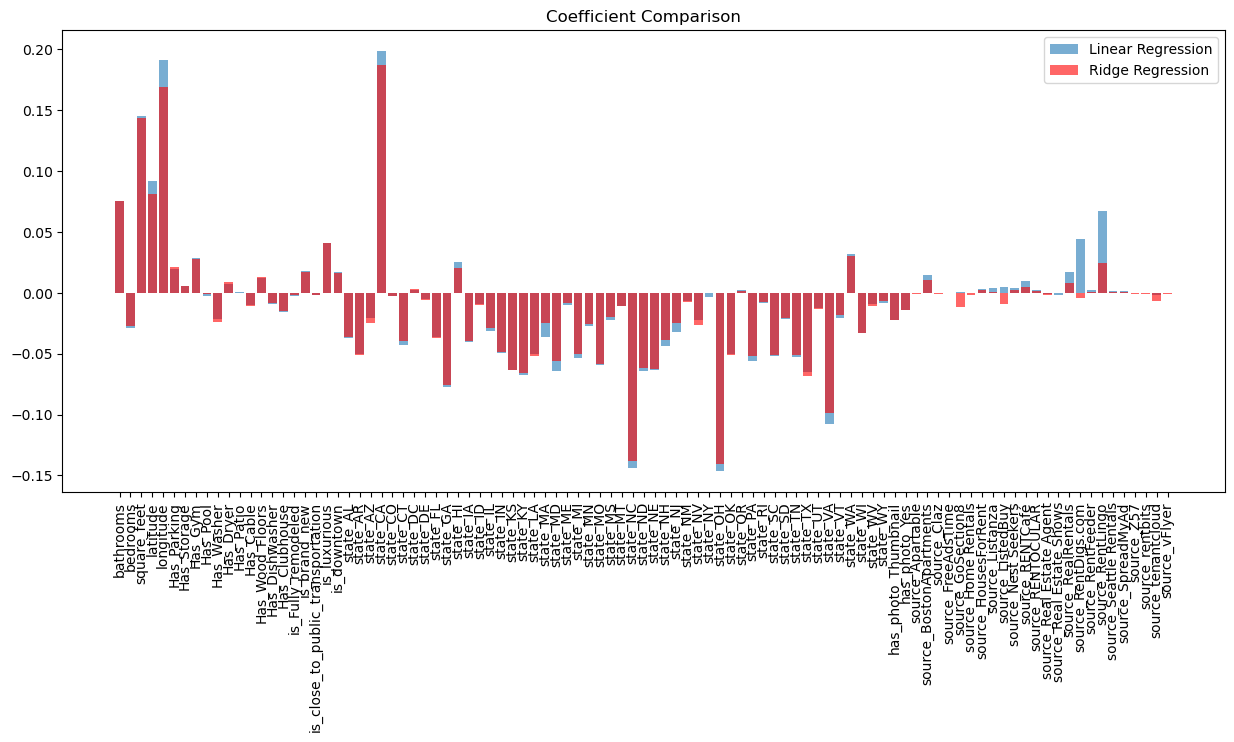

In [1188]:
feature_names = X.columns
plt.figure(figsize=(15, 6))
index = range(len(feature_names))
plt.bar(index, linear_coefficients, label='Linear Regression', alpha=0.6)
plt.bar(index, ridge_coefficients, label='Ridge Regression', alpha=0.6, color='red')
plt.xticks(index, feature_names, rotation='vertical')
plt.legend()
plt.title('Coefficient Comparison')
plt.show()

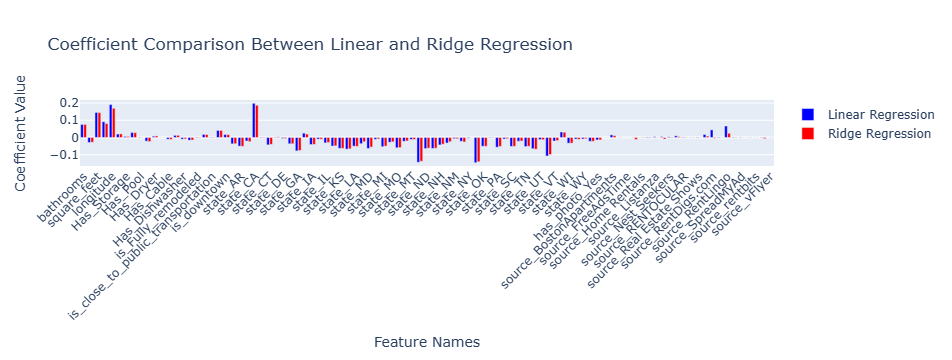

In [1189]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=linear_coefficients,
    name='Linear Regression',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=feature_names,
    y=ridge_coefficients,
    name='Ridge Regression',
    marker_color='red'
))

# Customizing the layout
fig.update_layout(
    title='Coefficient Comparison Between Linear and Ridge Regression',
    xaxis_tickangle=-45,
    xaxis_title='Feature Names',
    yaxis_title='Coefficient Value',
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1
)

fig.show()

In [1190]:
# Ridge Model

#from sklearn import linear_model

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Find optimal lambda
#n_lambdas = 600
#lambdas = np.linspace(0, 1000, n_lambdas)
#mses = []
#coefs = np.zeros((n_lambdas,97))
#l=0
#while l<=n_lambdas-1:
    #model_ridge = linear_model.Ridge(alpha=lambdas[l], fit_intercept=True)
    #model_ridge.fit(X, y)
    #scores = cross_val_score(model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    #scores = -scores
    #score = scores.mean()
    #mses.append(score)
    #coefs[l,:] = (model_ridge.coef_)
    #l=l+1
#optimal_lambda = lambdas[np.argmin(mses)]

#### Lasso

In [1191]:
# Preparing the features (X) and target (y)
X = cleaned_apt_df.drop(columns=['price', 'log_price'])
y = cleaned_apt_df['log_price']

n_lambdas = 100 
lambdas = np.logspace(-4, 2, n_lambdas)
mses = []
coefs = []

for alpha in lambdas:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, fit_intercept=True, max_iter=10000))
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    
    scores = -scores
    mses.append(scores.mean())
    
    pipeline.fit(X, y)  # Fitting the model to get coefficients
    coefs.append(pipeline.named_steps['lasso'].coef_)

optimal_lambda = lambdas[np.argmin(mses)]
print(f"Optimal Lambda for Lasso: {optimal_lambda}")


Optimal Lambda for Lasso: 0.0001


In [1193]:
# Lasso regression
lasso_model_optimal_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=optimal_lambda))

# Cross-validation
lasso_cv_scores = cross_val_score(lasso_model_optimal_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_r2 = cross_val_score(lasso_model_optimal_pipeline, X, y, cv=5, scoring='r2')

# Evaluation
lasso_cv_r2_mean = lasso_cv_r2.mean()
lasso_cv_scores_mean = -lasso_cv_scores.mean()
lasso_cv_scores_std = lasso_cv_scores.std()

lasso_cv_scores_mean, lasso_cv_scores_std, lasso_cv_r2_mean


C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+00, tolerance: 1.504e+00

C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+00, tolerance: 1.504e+00



(0.08357872789371219, 0.007496150212778543, 0.55965240154726)

In [1194]:
# Final evaluation for lasso
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=optimal_lambda))

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting the Lasso pipeline on the training data
lasso_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_lasso, rmse_lasso, r2_lasso


(0.07871199840765282, 0.2805565868192241, 0.5883243618460872)

In [1195]:
lasso_model = lasso_pipeline.named_steps['lasso']

# Extracting coefficients
lasso_coefficients = lasso_model.coef_

# Mapping coefficients to feature names
feature_names = X.columns
lasso_coefficients_dict = dict(zip(feature_names, lasso_coefficients))

lasso_coefficients_dict

{'bathrooms': 0.07438226013686117,
 'bedrooms': -0.02924054152925813,
 'square_feet': 0.14645687569490826,
 'latitude': 0.08409895252454931,
 'longitude': 0.14823316072472054,
 'Has_Parking': 0.020006260889690833,
 'Has_Storage': 0.00641718412128926,
 'Has_Gym': 0.028309536250617297,
 'Has_Pool': -0.0,
 'Has_Washer': -0.022069002015470938,
 'Has_Dryer': 0.007425811647218311,
 'Has_Patio': 0.000597820473290698,
 'Has_Cable': -0.010049884868231612,
 'Has_Wood_Floors': 0.011974041924651886,
 'Has_Dishwasher': -0.010555228774262801,
 'Has_Clubhouse': -0.01585063828875868,
 'is_Fully_remodeled': -0.0019242338533416686,
 'is_brand_new': 0.017155990566609623,
 'is_close_to_public_transportation': -0.002597230513772762,
 'is_luxurious': 0.04133513168747486,
 'is_downtown': 0.01628207410755218,
 'state_AL': -0.03125911741782,
 'state_AR': -0.042767643982345824,
 'state_AZ': -0.01345875999245897,
 'state_CA': 0.20501906163577954,
 'state_CO': 0.01551021333035606,
 'state_CT': -0.0315948835906725

In [1196]:
# Identify the coefficients that were reduced to 0
zero_coefficients = {feature: coef for feature, coef in lasso_coefficients_dict.items() if abs(coef) < 1e-10}

print("Features reduced to zero by Lasso:")
for feature, coef in zero_coefficients.items():
    print(f"{feature}: {coef}")


Features reduced to zero by Lasso:
Has_Pool: -0.0
source_Apartable: 0.0
source_RentDigs.com: -0.0
source_Seattle Rentals: 0.0


In [1197]:
sum_sq_lasso = np.sum(np.square(lasso_coefficients))
print(f"Sum squared error of Linear: {sum_sq_linear:.8f}")
print(f"Sum squared error of Ridge: {sum_sq_ridge:.8f}")
print(f"Sum squared error of Lasso: {sum_sq_lasso:.8f}")

Sum squared error of Linear: 0.25227165
Sum squared error of Ridge: 0.22196241
Sum squared error of Lasso: 0.17903211


In [1199]:
print(f"Mean squared errors of Linear: {mse_lin:.8f}")
print(f"Mean squared error of Ridge: {mse_ridge:.8f}")
print(f"Mean squared error of Lasso: {mse_lasso:.8f}")

Mean squared errors of Linear: 0.08024058
Mean squared error of Ridge: 0.07969907
Mean squared error of Lasso: 0.07871200


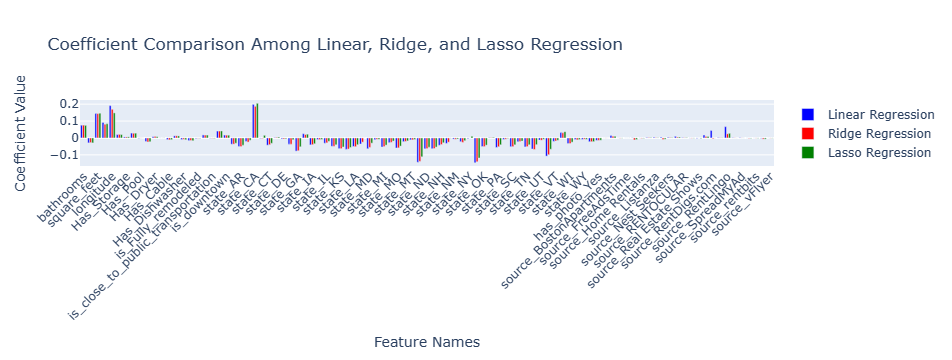

In [1198]:
fig = go.Figure()

# Trace for Linear Regression coefficients
fig.add_trace(go.Bar(
    x=feature_names,
    y=linear_coefficients,
    name='Linear Regression',
    marker_color='blue'
))

# Trace for Ridge Regression coefficients
fig.add_trace(go.Bar(
    x=feature_names,
    y=ridge_coefficients,
    name='Ridge Regression',
    marker_color='red'
))

# Trace for Lasso Regression coefficients
fig.add_trace(go.Bar(
    x=feature_names,
    y=lasso_coefficients,
    name='Lasso Regression',
    marker_color='green'  # Choosing a different color for Lasso
))

# Customizing the layout
fig.update_layout(
    title='Coefficient Comparison Among Linear, Ridge, and Lasso Regression',
    xaxis_tickangle=-45,
    xaxis_title='Feature Names',
    yaxis_title='Coefficient Value',
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1
)

fig.show()


In [1221]:
# Creating a dataframe to compare the models' performance and coefficients
model_comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Average MSE': [lin_cv_scores_mean, ridge_cv_scores_mean, lasso_cv_scores_mean],
    'R^2': [lin_cv_r2_mean, ridge_cv_r2_mean, lasso_cv_r2_mean],
    'Sum Squared Error': [sum_sq_linear, sum_sq_ridge, sum_sq_lasso]
    #'Coefficients': [linear_reg_coeffs_new, ridge_coeffs_new, lasso_coeffs_new]
})

model_comparison_df

,Model,Average MSE,R^2,Sum Squared Error
0,Linear Regression,0.084163,0.556775,0.252272
1,Ridge Regression,0.083486,0.560103,0.221962
2,Lasso Regression,0.083579,0.559652,0.179032


#### Post-LASSO

In [1226]:
# Preparing the features (X) and target (y)
X = cleaned_apt_df.drop(columns=['price', 'log_price', 'Has_Pool', 'source_Apartable', 'source_RentDigs.com','source_Seattle Rentals'])
y = cleaned_apt_df['log_price']

# Prepare a pipeline for cross validation
linear_pipeline2 = make_pipeline(StandardScaler(), LinearRegression())

# Linear regression cross-validation
linear_cv_scores2 = cross_val_score(linear_pipeline2, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_r22 = cross_val_score(linear_pipeline2, X, y, cv=5, scoring='r2')

# Evaluation
linear_cv_r2_mean2 = linear_cv_r22.mean()
linear_cv_scores_mean2 = -linear_cv_scores2.mean()
linear_cv_scores_std2 = linear_cv_scores2.std()

linear_cv_scores_mean2,linear_cv_scores_std2, linear_cv_r2_mean2

(0.08349461344121421, 0.007523423339876874, 0.560042010211912)

In [1227]:
# Compare new linear regression to the old
lr_comparison_df = pd.DataFrame({
    'Model': ['New Linear Regression', 'Old Linear Regression'],
    'Average MSE': [linear_cv_scores_mean2, lin_cv_scores_mean],
    'Average SD of MSE': [linear_cv_scores_std2, lin_cv_scores_mean],
    'R^2': [linear_cv_r2_mean2, lin_cv_r2_mean],
})

lr_comparison_df

,Model,Average MSE,Average SD of MSE,R^2
0,New Linear Regression,0.083495,0.007523,0.560042
1,Old Linear Regression,0.084163,0.084163,0.556775


In [1201]:
# Final evaluation by splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


lin_pipeline = make_pipeline(StandardScaler(), LinearRegression())
lin_pipeline.fit(X_train, y_train)
y_pred = lin_pipeline.predict(X_test)

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred)

mse_lin, rmse_lin, r2_lin

(0.07996282934204013, 0.28277699577943066, 0.5891167171357337)

#### Feature Scaling (not used)

In [1237]:
#from sklearn.preprocessing import StandardScaler

# Seperate features in to different groups for scaling
#continous_features = ['square_feet', 'latitude','longitude']
#discrete_features = ['bedrooms', 'bathrooms']
#binary_features = ['Has_Parking', 'Has_Storage', 'Has_Gym', 'Has_Pool', 'Has_Washer', 'Has_Dryer', 'Has_Patio', 'Has_Cable', 
                   #'Has_Wood_Floors', 'Has_Dishwasher', 'Has_Clubhouse', 'is_Fully_remodeled', 'is_brand_new', 
                   #'is_close_to_public_transportation', 'is_luxurious', 'is_downtown', 'state_AL', 'state_AR', 
                   #'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 
                   #'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 
                   #'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 
                   #'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 
                   #'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 
                   #'state_WI', 'state_WV', 'state_WY', 'has_photo_Thumbnail', 'has_photo_Yes', 
                   #'source_Apartable', 'source_BostonApartments', 'source_Claz', 'source_FreeAdsTime', 
                   #'source_GoSection8', 'source_Home Rentals', 'source_HousesForRent', 'source_Listanza', 'source_ListedBuy', 
                   #'source_Nest Seekers', 'source_RENTCafé', 'source_RENTOCULAR', 'source_Real Estate Agent', 
                   #'source_Real Estate Shows', 'source_RealRentals', 'source_RentDigs.com', 'source_RentFeeder', 
                   #'source_RentLingo', 'source_Seattle Rentals', 'source_SpreadMyAd', 'source_Z57', 'source_rentbits', 
                   #'source_tenantcloud', 'source_vFlyer']

# Apply StandardScaler to continuous and discrete features
#scaler = StandardScaler()
#cleaned_apt_df[discrete_features + continous_features] = scaler.fit_transform(cleaned_apt_df[discrete_features + continous_features])

#pd.reset_option('all')
# Combine all features
#model_df = cleaned_apt_df[continous_features + discrete_features + binary_features]
#model_df

### Data Prep for Clustering (not use

In [ ]:
# Making a copy of the dataframe for analysis
apt_copy2 = apt_df.copy()

# Keeping observations that are apratment renting only
apt_copy2= apt_copy2[apt_copy2['category'] == 'housing/rent/apartment']
apt_copy = apt_copy[apt_copy['price_type'] == 'Monthly']
apt_copy = apt_copy[~apt_copy['state'].isin(['AK', 'HI'])]
# Keywords from amenities
keywords = ['Parking', 'Storage', 'Gym', 'Pool', 'Washer', 'Dryer', 'Patio', 'Cable', 'Wood Floors', 'Dishwasher', 'Clubhouse']

# Create a dummy variable for each
for keyword in keywords:
    apt_copy["Has_" + keyword] = apt_copy['amenities'].str.contains(keyword, case=False, na=False).astype(int)

In [624]:
# Dropping irrelevant columns
columns_to_drop = ['id', 'category', 'title', 'body', 'currency', 'fee', 'address', 'has_photo', 'source',
                   'price_display', 'price_type', 'time', 'pets_allowed', 'amenities','cityname','state']

new_apt_df = apt_copy.drop(columns=columns_to_drop)

new_apt_df.columns


Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer',
       'Has_Dryer', 'Has_Patio', 'Has_Cable'],
      dtype='object')

In [625]:
new_apt_df

,bathrooms,bedrooms,price,square_feet,latitude,longitude,Has_Parking,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable
0,1.0,1.0,2195.0,542,33.8520,-118.3759,0,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500,37.0867,-76.4941,0,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650,35.8230,-78.6438,0,0,0,0,0,0,0
3,1.0,2.0,1600.0,820,38.3622,-121.9712,0,0,0,0,0,0,0
4,1.0,1.0,975.0,624,35.1038,-106.6110,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,1.0,780.0,605,29.6151,-95.1998,1,1,0,0,0,1,0
99488,2.0,2.0,813.0,921,30.2254,-81.7579,1,1,1,1,1,1,1
99489,1.0,1.0,1325.0,650,32.7379,-117.0914,0,0,0,0,0,0,0
99490,1.0,1.0,931.0,701,35.4158,-80.8451,0,1,1,0,0,0,0


In [627]:
new_apt_df.isnull().sum()

bathrooms       60
bedrooms       123
price            1
square_feet      0
latitude        25
longitude       25
Has_Parking      0
Has_Gym          0
Has_Pool         0
Has_Washer       0
Has_Dryer        0
Has_Patio        0
Has_Cable        0
dtype: int64

In [626]:
# Checking for missing value percentage
missing_values = new_apt_df.isnull().sum()
missing_values_percentage = (missing_values / new_apt_df.shape[0]) * 100

missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_values_summary


,Missing Values,Percentage
bathrooms,60,0.060400
bedrooms,123,0.123820
price,1,0.001007
square_feet,0,0.000000
latitude,25,0.025167
longitude,25,0.025167
Has_Parking,0,0.000000
Has_Gym,0,0.000000
Has_Pool,0,0.000000
Has_Washer,0,0.000000


In [628]:
new_apt_df.bathrooms.value_counts()

1.0    56211
2.0    36527
1.5     3172
2.5     2077
3.0      885
3.5      206
4.0      118
4.5       42
5.0       20
6.0        8
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: bathrooms, dtype: int64

In [629]:
# Since there aren't a large number of missing values, we can now drop the missing values
cleaned_apt_df = new_apt_df.dropna(subset=['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude'])

In [630]:
cleaned_apt_df

,bathrooms,bedrooms,price,square_feet,latitude,longitude,Has_Parking,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable
0,1.0,1.0,2195.0,542,33.8520,-118.3759,0,0,0,0,0,0,0
1,1.5,3.0,1250.0,1500,37.0867,-76.4941,0,0,0,0,0,0,0
2,2.0,3.0,1395.0,1650,35.8230,-78.6438,0,0,0,0,0,0,0
3,1.0,2.0,1600.0,820,38.3622,-121.9712,0,0,0,0,0,0,0
4,1.0,1.0,975.0,624,35.1038,-106.6110,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,1.0,780.0,605,29.6151,-95.1998,1,1,0,0,0,1,0
99488,2.0,2.0,813.0,921,30.2254,-81.7579,1,1,1,1,1,1,1
99489,1.0,1.0,1325.0,650,32.7379,-117.0914,0,0,0,0,0,0,0
99490,1.0,1.0,931.0,701,35.4158,-80.8451,0,1,1,0,0,0,0


In [631]:
cleaned_apt_df.isnull().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
latitude       0
longitude      0
Has_Parking    0
Has_Gym        0
Has_Pool       0
Has_Washer     0
Has_Dryer      0
Has_Patio      0
Has_Cable      0
dtype: int64

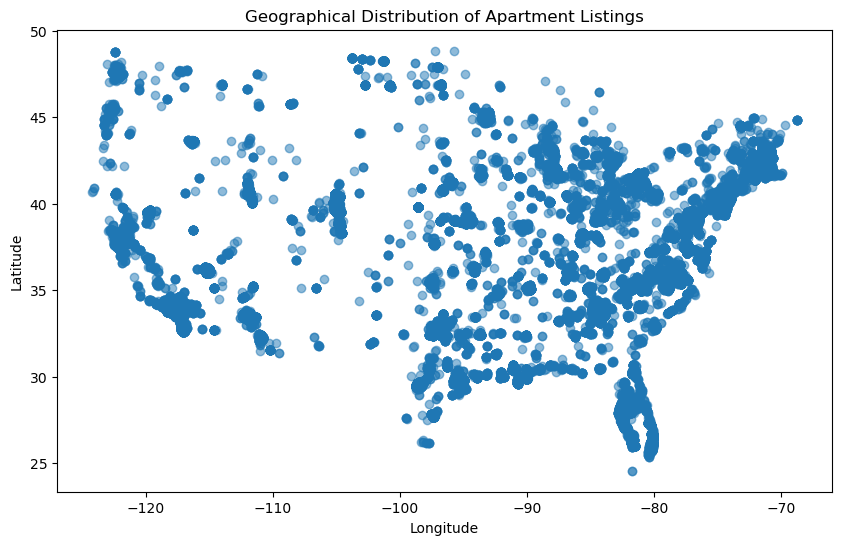

In [632]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_apt_df['longitude'], cleaned_apt_df['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Apartment Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [633]:
cleaned_apt_df.columns

Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer',
       'Has_Dryer', 'Has_Patio', 'Has_Cable'],
      dtype='object')

In [634]:
# Taking the logarithm of the price and square footage to reduce skewness
cleaned_apt_df['log_price'] = np.log(cleaned_apt_df['price'] + 1)
cleaned_apt_df['log_square_feet'] = np.log(cleaned_apt_df['square_feet'] + 1)

C:\Users\zhaoy\AppData\Local\Temp\ipykernel_13132\2880766336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zhaoy\AppData\Local\Temp\ipykernel_13132\2880766336.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [637]:
cleaned_apt_df.columns

Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer',
       'Has_Dryer', 'Has_Patio', 'Has_Cable', 'log_price', 'log_square_feet'],
      dtype='object')

In [638]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Define features
numerical_features = ['latitude', 'longitude']
log_transformed_features = ['log_price', 'log_square_feet']
discrete_features = ['bedrooms', 'bathrooms']
binary_features = ['Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer', 'Has_Dryer', 'Has_Patio', 'Has_Cable']

# Apply MinMax scaling to discrete numerical features
minmax_scaler = MinMaxScaler()
cleaned_apt_df[discrete_features] = minmax_scaler.fit_transform(cleaned_apt_df[discrete_features])

# Apply StandardScaler to continuous numerical features and log-transformed features
scaler = StandardScaler()
cleaned_apt_df[numerical_features + log_transformed_features] = scaler.fit_transform(cleaned_apt_df[numerical_features + log_transformed_features])

# Combine all features for clustering
features_for_clustering = cleaned_apt_df[numerical_features + log_transformed_features + discrete_features + binary_features]

# Relevant features
#features = cleaned_apt_df[['price', 'square_feet', 'latitude', 'longitude',]]
                           #'Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer', 'Has_Dryer', 'Has_Patio', 'Has_Cable']]

# Standardizing the features
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [639]:
features_for_clustering

,latitude,longitude,log_price,log_square_feet,bedrooms,bathrooms,Has_Parking,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable
0,-0.677227,-1.709845,1.065830,-1.527062,0.111111,0.0000,0,0,0,0,0,0,0
1,0.032704,0.955468,-0.217438,1.522079,0.333333,0.0625,0,0,0,0,0,0,0
2,-0.244645,0.818664,0.032668,1.807716,0.333333,0.1250,0,0,0,0,0,0,0
3,0.312642,-1.938646,0.345147,-0.287305,0.222222,0.0000,0,0,0,0,0,0,0
4,-0.402490,-0.961139,-0.783559,-1.105299,0.111111,0.0000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,-1.607115,-0.234943,-1.291872,-1.197878,0.111111,0.0000,1,1,0,0,0,1,0
99488,-1.473170,0.620486,-1.197489,0.060626,0.222222,0.1250,1,1,1,1,1,1,1
99489,-0.921743,-1.628101,-0.084654,-0.983073,0.111111,0.0000,0,0,0,0,0,0,0
99490,-0.334015,0.678575,-0.888762,-0.756890,0.111111,0.0000,0,1,1,0,0,0,0


In [640]:
# Using the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

In [890]:
model_df

,price,square_feet,bedrooms,bathrooms,Has_Parking,Has_Storage,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable,Has_Wood_Floors,Has_Dishwasher,Has_Clubhouse,is_Fully_remodeled,is_brand_new,is_close_to_public_transportation,is_luxurious,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,has_photo_No,has_photo_Thumbnail,has_photo_Yes,source_AgentWebsite,source_Apartable,source_BostonApartments,source_Claz,source_FreeAdsTime,source_GoSection8,source_Home Rentals,source_HousesForRent,source_Listanza,source_ListedBuy,source_Nest Seekers,source_RENTCafé,source_RENTOCULAR,source_Real Estate Agent,source_Real Estate Shows,source_RealRentals,source_RentDigs.com,source_RentFeeder,source_RentLingo,source_Seattle Rentals,source_SpreadMyAd,source_Z57,source_rentbits,source_tenantcloud,source_vFlyer
0,0.743141,-1.134204,-0.973284,-0.815083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-0.308077,1.490359,1.699245,0.099249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.146779,1.901303,1.699245,1.013582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.081263,-0.372588,0.362980,-0.815083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.613988,-0.909555,-0.973284,-0.815083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,-0.830906,-0.961608,-0.973284,-0.815083,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
99488,-0.794196,-0.095885,0.362980,1.013582,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
99489,-0.224647,-0.838324,-0.973284,-0.815083,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
99490,-0.662933,-0.698603,-0.973284,-0.815083,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1043]:
# Using the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cleaned_apt_df)
    wcss.append(kmeans.inertia_)

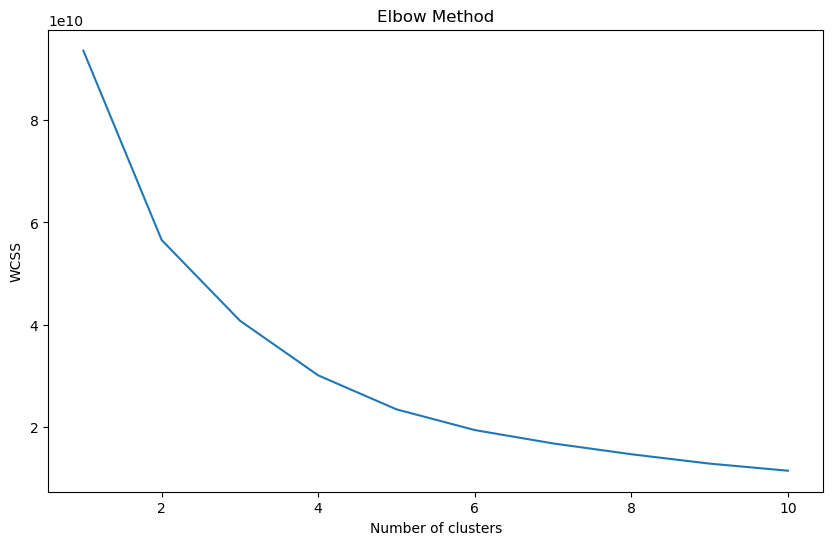

In [1044]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

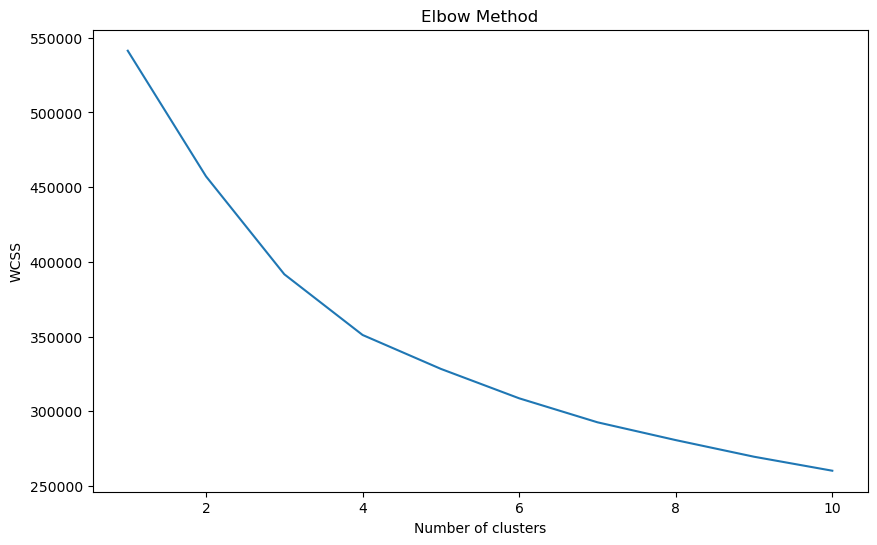

In [641]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

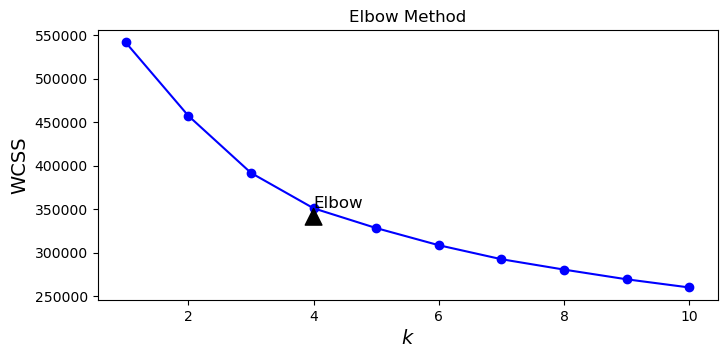

In [642]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), wcss, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("WCSS", fontsize=14)

elbow_point = 4
plt.annotate('Elbow',
             xy=(elbow_point, wcss[elbow_point - 1]),
             xytext=(elbow_point, wcss[elbow_point - 1] + 200),
             textcoords='data',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05)
            )

plt.title('Elbow Method')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.14240964481789425
For n_clusters = 3 The average silhouette_score is : 0.16436965334456163
For n_clusters = 4 The average silhouette_score is : 0.15746535318827026
For n_clusters = 5 The average silhouette_score is : 0.1437904786983957
For n_clusters = 6 The average silhouette_score is : 0.15173450708253966
For n_clusters = 7 The average silhouette_score is : 0.15469147128319355
For n_clusters = 8 The average silhouette_score is : 0.1425370743473348
For n_clusters = 9 The average silhouette_score is : 0.14137769391163418
For n_clusters = 10 The average silhouette_score is : 0.13634301778151034


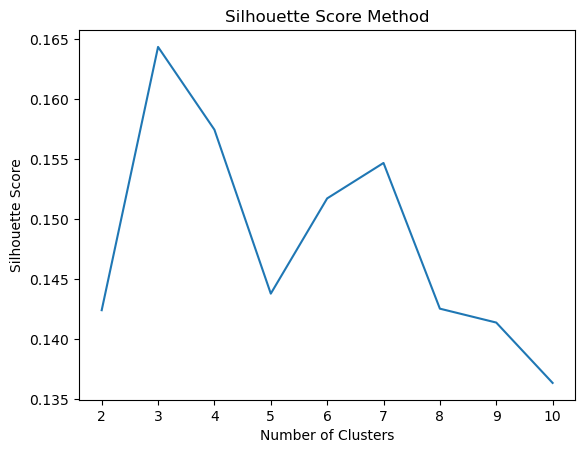

In [643]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))

silhouette_avg_scores = []

# Compute the silhouette score for each cluster size
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(features_for_clustering)
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [644]:
# Identify the optimal number of clusters as the one with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print("Optimal number of clusters based on silhouette score:", optimal_n_clusters)

Optimal number of clusters based on silhouette score: 3


In [646]:
# Running K-Means with the optimal number of clusters
optimal_n_clusters = 3 
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_for_clustering)

# Add the cluster labels
cleaned_apt_df['Cluster'] = cluster_labels

C:\Users\zhaoy\AppData\Local\Temp\ipykernel_13132\2550719035.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [647]:
cleaned_apt_df

,bathrooms,bedrooms,price,square_feet,latitude,longitude,Has_Parking,Has_Gym,Has_Pool,Has_Washer,Has_Dryer,Has_Patio,Has_Cable,log_price,log_square_feet,Cluster
0,0.0000,0.111111,2195.0,542,-0.677227,-1.709845,0,0,0,0,0,0,0,1.065830,-1.527062,0
1,0.0625,0.333333,1250.0,1500,0.032704,0.955468,0,0,0,0,0,0,0,-0.217438,1.522079,1
2,0.1250,0.333333,1395.0,1650,-0.244645,0.818664,0,0,0,0,0,0,0,0.032668,1.807716,1
3,0.0000,0.222222,1600.0,820,0.312642,-1.938646,0,0,0,0,0,0,0,0.345147,-0.287305,0
4,0.0000,0.111111,975.0,624,-0.402490,-0.961139,0,0,0,0,0,0,0,-0.783559,-1.105299,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,0.0000,0.111111,780.0,605,-1.607115,-0.234943,1,1,0,0,0,1,0,-1.291872,-1.197878,2
99488,0.1250,0.222222,813.0,921,-1.473170,0.620486,1,1,1,1,1,1,1,-1.197489,0.060626,2
99489,0.0000,0.111111,1325.0,650,-0.921743,-1.628101,0,0,0,0,0,0,0,-0.084654,-0.983073,0
99490,0.0000,0.111111,931.0,701,-0.334015,0.678575,0,1,1,0,0,0,0,-0.888762,-0.756890,2


In [666]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.13388638, -1.41170801,  0.62539775,  0.04946279,  0.19584999,
         0.06501304,  0.44418433,  0.36959915,  0.43190406,  0.28121406,
         0.20769673,  0.24597503,  0.08801544],
       [ 0.50698715,  0.81412133,  0.4618529 ,  0.46039129,  0.21983937,
         0.07411339,  0.45297792,  0.36736809,  0.39408158,  0.30398112,
         0.24042143,  0.26563804,  0.12326204],
       [-0.52125499,  0.15210294, -0.78096729, -0.42949536,  0.16559834,
         0.03410013,  0.42832526,  0.38564507,  0.47949653,  0.4039009 ,
         0.31224714,  0.28030568,  0.1506668 ]])

In [649]:
# Get the average price for each cluster
average_price_per_cluster = cleaned_apt_df.groupby('Cluster')['price'].mean()
print(average_price_per_cluster)

Cluster
0    1979.180926
1    1798.334418
2    1016.953786
Name: price, dtype: float64


In [654]:
# Assuming 'Cluster' is the column with your cluster labels
cluster_summary = cleaned_apt_df.groupby('Cluster')[['price', 'square_feet', 'bedrooms', 'bathrooms']].mean()

cluster_summary


,price,square_feet,bedrooms,bathrooms
Cluster,,,,
0,1979.180926,972.213497,0.195890,0.065075
1,1798.334418,1110.048115,0.219963,0.074236
2,1016.953786,812.653384,0.165481,0.033967


In [670]:
cleaned_apt_df.columns

Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'Has_Parking', 'Has_Gym', 'Has_Pool', 'Has_Washer',
       'Has_Dryer', 'Has_Patio', 'Has_Cable', 'log_price', 'log_square_feet',
       'Cluster', 'cluster_dbscan'],
      dtype='object')

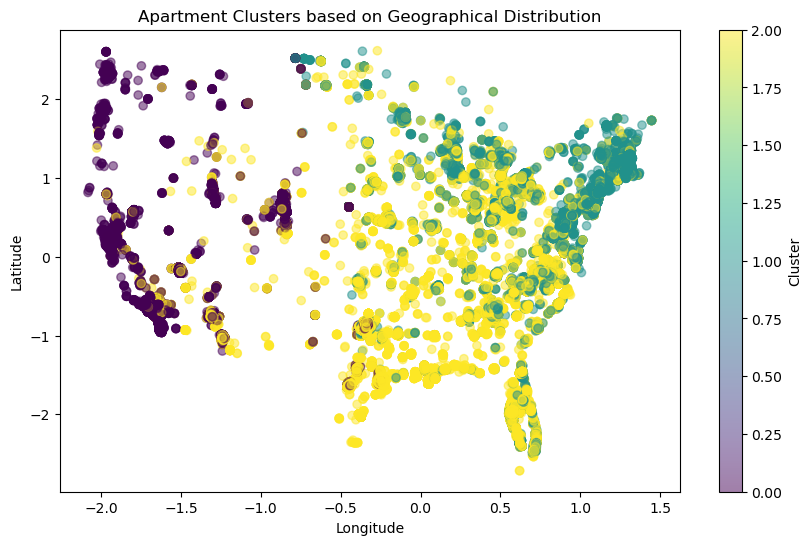

In [655]:
# Note: Since we're dealing with multi-dimensional data, we'll need to choose two dimensions for a 2D plot.
# A common approach is to visualize geographical clusters using latitude and longitude.
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_apt_df['longitude'], cleaned_apt_df['latitude'], c=cleaned_apt_df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Apartment Clusters based on Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


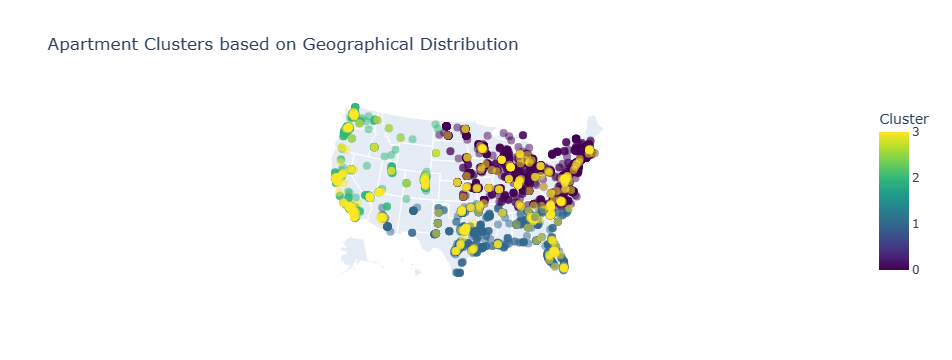

In [201]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    lon = cleaned_apt_df['longitude'],
    lat = cleaned_apt_df['latitude'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.5,
        colorscale = 'Viridis',
        color = cleaned_apt_df['Cluster'],
        colorbar_title = "Cluster",
        line_width = 0
    ),
    text = cleaned_apt_df['Cluster'],
))

fig.update_layout(
    title = 'Apartment Clusters based on Geographical Distribution',
    geo_scope='usa', )

fig.show()